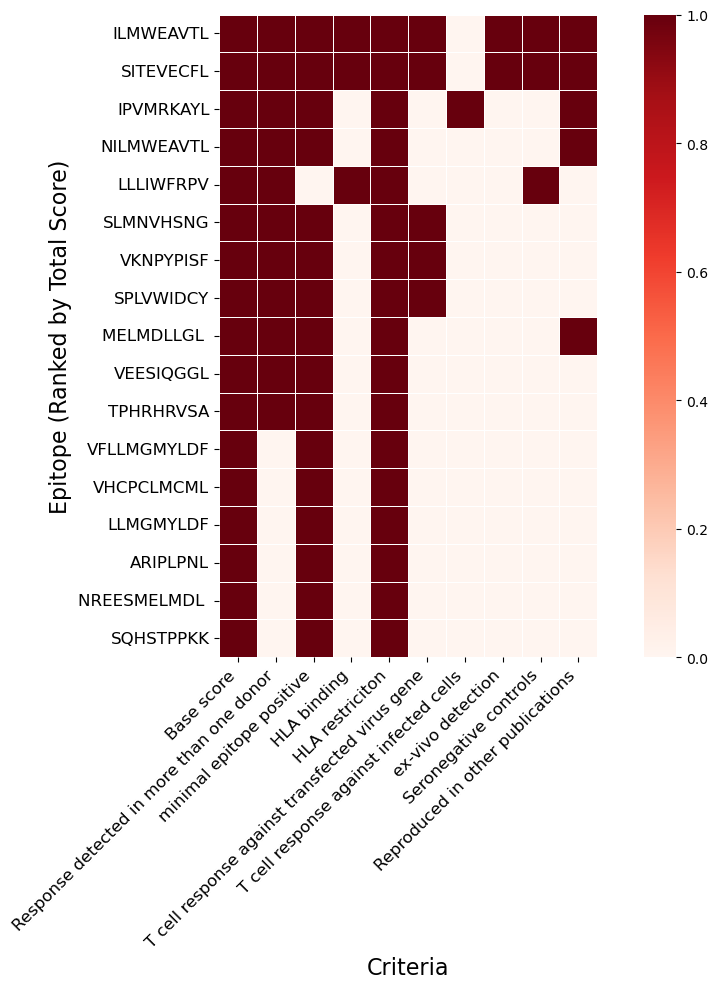

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Dataframe for scoring matrix_JCV.xlsx")
df.dropna(inplace=True)

# Identify scoring columns (all numeric columns)
scoring_cols = df.select_dtypes(include=["number"]).columns

# Compute total score per epitope
df["Total score"] = df[scoring_cols].sum(axis=1)

# Sort epitopes by total score (highest first)
df_sorted = df.sort_values("Total score", ascending=False)

# Matrix for heatmap: rows = epitopes, columns = criteria
matrix = df_sorted.set_index("Epitope")[scoring_cols]

# Create figure
plt.figure(figsize=(10, 10))

sns.heatmap(
    matrix,
    cmap="Reds",
    annot=False,              # <-- removed numbers
    linewidths=0.4,
    linecolor="white",
    cbar=True,
    square=True               # makes squares uniform and compact
)

plt.xlabel("Criteria", fontsize=16)
plt.ylabel("Epitope (Ranked by Total Score)", fontsize=16)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

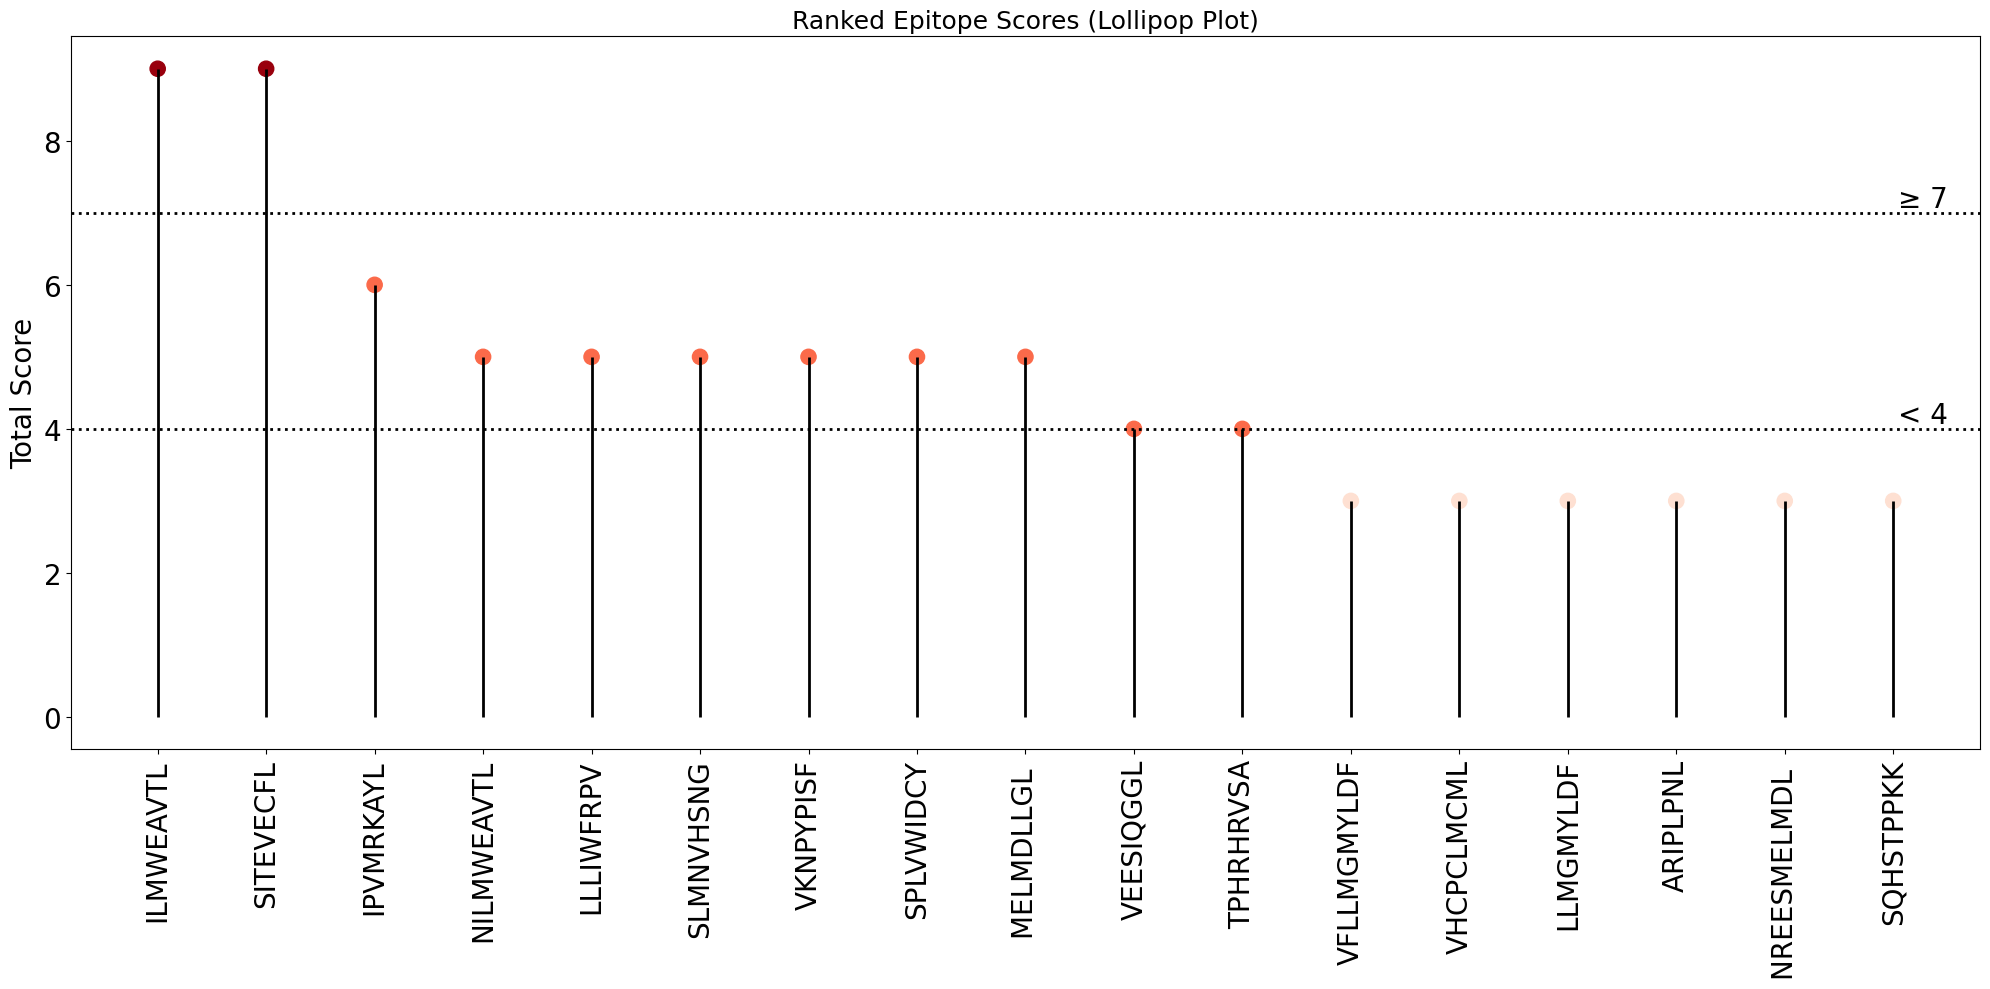

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# read in data
df = pd.read_excel("Dataframe for scoring matrix_JCV.xlsx")

# drop rows with empty values
df.dropna(inplace=True)

# detect numeric scoring columns
scoring_cols = df.select_dtypes(include=['number']).columns

# compute total score
df["Total score"] = df[scoring_cols].sum(axis=1)

# sort by score (highest first)
df_sorted = df.sort_values("Total score", ascending=False)

# figure
plt.figure(figsize=(20, 10))
plt.rcParams['axes.facecolor'] = 'white'

# x positions
x = range(len(df_sorted))
scores = df_sorted["Total score"].values

# assign three color shades
colors = []
for s in scores:
    if s >= 7:
        colors.append("#99000D")   # dark blue
    elif s >= 4:
        colors.append("#FB6A4A")   # medium blue
    else:
        colors.append("#FEE0D2")   # light blue

# stems
plt.vlines(x, 0, scores, linewidth=2, color="black")

# lollipop heads with the three shades
plt.scatter(x, scores, s=120, color=colors)

# thresholds (dotted)
plt.axhline(7, color='black', linestyle=':', linewidth=2)
plt.axhline(4, color='black', linestyle=':', linewidth=2)

# threshold labels
plt.text(len(df_sorted)-0.5, 7, "≥ 7",
         va='bottom', ha='right', fontsize=20)
plt.text(len(df_sorted)-0.5, 4, "< 4",
         va='bottom', ha='right', fontsize=20)

# labels & aesthetics
plt.xticks(x, df_sorted["Epitope"], rotation=90, fontsize=20)
plt.yticks (fontsize=20)
plt.ylabel("Total Score", fontsize=20)
plt.title("Ranked Epitope Scores (Lollipop Plot)", fontsize=18)

plt.tight_layout()
plt.show()